In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline 

In [146]:
def get_coordinates_from_index(n, x, y):
    if n < 0:
        return (-1, -1)
    else:
        return (n % y, n // y)


def get_index_from_coordinates(c, x, y):
    if c[0] < 0 or c[1] < 0 or c[0] > y or c[1] > x:
        return -1
    else:
        return c[1]*y + c[0]


def get_neighbors_from_index(n, x, y):
    c = get_coordinates_from_index(n, x, y)
    neighbors_c = [(c[0]-1, c[1]), (c[0]+1, c[1]),
                   (c[0], c[1]-1), (c[0], c[1]+1)]
    neighbors_c = [c for c in neighbors_c
                   if c[0] >= 0 and c[1] >= 0 and c[1] < x and c[0] < y]
    neighbors = [get_index_from_coordinates(c, x, y) for c in neighbors_c]
    return list(set(neighbors))


def calculate_topographical_error(som, n_rows, n_columns):
    surface_state = som.get_surface_state()
    bmus_1st_and_2nd = np.argsort(surface_state, axis=1)[:, :2]
    all_2nd = []
    for i, second_index in enumerate(bmus_1st_and_2nd[:, 1]):
        all_2nd.append([])
        distance = surface_state[i, second_index]
        for s_i, s in enumerate(surface_state[i]):
            if abs(s-distance) < 10e-5:
                all_2nd[-1].append(s_i)
    neighbors = [get_neighbors_from_index(t, n_rows, n_columns)
                 for t in bmus_1st_and_2nd[:, 0]]

    e_t = 1-np.mean([len(set(second) & set(neighs)) > 0 for (second, neighs) in
                     zip(all_2nd, neighbors)])
    return e_t

In [147]:
# Our data
dataset = pd.read_csv('dust_calculation.csv')
X = dataset.iloc[:, 1:]

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print(np.shape(X))
labels = range(X.shape[0])
print(labels)

(2328, 7)
range(0, 2328)


In [148]:
n_rows, n_columns = 15, 15
som = somoclu.Somoclu(n_columns, n_rows, data=X, maptype="toroid")
%time som.train(epochs=1000, radius0=15, radiusN=1, scale0=0.1, scaleN=0.01)

CPU times: user 38.9 s, sys: 55.3 ms, total: 39 s
Wall time: 10.7 s


The topographical error obtained is: 0.24226804123711343


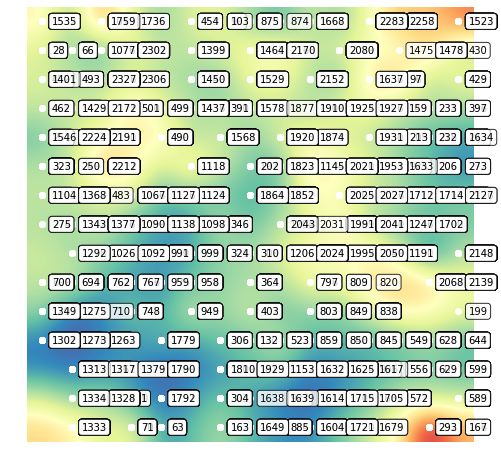

<module 'matplotlib.pyplot' from '/home/valyay/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [149]:
e_t = calculate_topographical_error(som, n_rows, n_columns)
print("The topographical error obtained is: %s"%e_t)
som.view_umatrix(bestmatches=True, labels=labels)

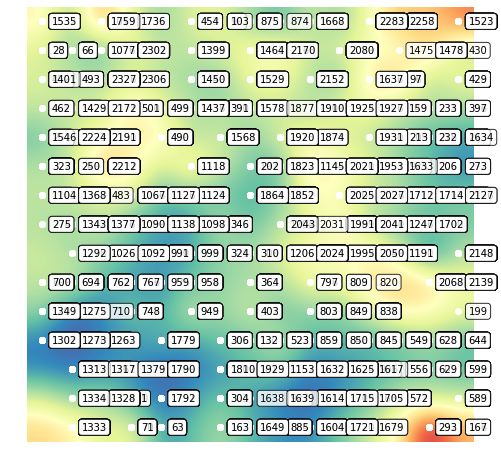

(2328, 225)
[[1.09001865 0.84935758 0.94721046 ... 0.90976648 0.59737954 0.61625692]
 [1.08954041 0.85887847 0.9587966  ... 0.91650035 0.62056391 0.6241004 ]
 [1.09202991 0.87550837 0.99489597 ... 0.93093951 0.6342276  0.62702252]
 ...
 [0.66822658 0.43983855 0.50180432 ... 0.84630118 0.83434149 0.51088155]
 [0.71130622 0.46424537 0.52439168 ... 0.8339981  0.78108272 0.49597668]
 [0.70327273 0.47310519 0.52343103 ... 0.84178762 0.81676711 0.52439462]]


In [150]:
som.view_umatrix(bestmatches=True, labels=labels)
som_state = som.get_surface_state()
print(np.shape(som_state))
print(som_state)

In [151]:
print(np.shape(som.codebook))
print(som.codebook)

(15, 15, 7)
[[[0.20051092 0.72857755 0.36968616 ... 0.9864754  0.30306467 0.05454837]
  [0.30708084 0.6090419  0.63357794 ... 0.8562151  0.04761903 0.2285715 ]
  [0.50321573 0.57189065 0.65384793 ... 0.89351994 0.         0.45956576]
  ...
  [0.29577452 0.53781015 0.2648031  ... 0.6568226  0.9987976  0.2950474 ]
  [0.26535055 0.6116913  0.31584817 ... 0.67923945 0.60942763 0.20577194]
  [0.16668884 0.7919317  0.2713937  ... 0.97209734 0.33333343 0.02145317]]

 [[0.20664638 0.7475996  0.5155313  ... 0.97155684 0.02764938 0.17132616]
  [0.301752   0.6505484  0.5080517  ... 0.94155705 0.         0.09938117]
  [0.46681815 0.5584117  0.51107275 ... 0.7476079  0.         0.18772814]
  ...
  [0.25877064 0.74400246 0.25088555 ... 0.7918179  0.72856784 0.32839218]
  [0.3563461  0.8697762  0.01678377 ... 0.99037284 0.6635056  0.25849766]
  [0.23131013 0.79431915 0.23490825 ... 0.96817344 0.3521894  0.28621754]]

 [[0.14584169 0.69503015 0.3046684  ... 0.9649238  0.06380369 0.39395672]
  [0.36330

In [152]:
my_bmus = som.get_bmus(som_state)
print(my_bmus)

[[ 3 13]
 [ 3 13]
 [ 3 14]
 ...
 [ 2  2]
 [ 2  2]
 [ 2  2]]


In [153]:
som.cluster()
# k = 0  # The data instance you are interested in 
#som.clusters[som.bmus]
print(som.clusters)

print(np.shape(som.bmus))
print(som.bmus)
# print(np.shape(som.umatrix))
# print(som.umatrix)


[[6 6 6 3 7 7 7 7 7 2 1 1 1 1 6]
 [6 6 6 6 7 7 7 7 7 1 1 1 1 6 6]
 [6 6 4 6 7 7 7 7 7 4 4 6 6 6 6]
 [6 6 6 7 7 7 7 7 3 4 4 4 6 6 6]
 [4 1 1 7 7 7 7 7 3 3 4 4 6 4 4]
 [4 4 4 4 5 5 5 5 5 0 0 0 4 4 4]
 [4 4 4 5 5 5 5 5 5 0 0 0 4 4 4]
 [4 4 4 5 5 5 5 5 2 0 0 0 4 4 4]
 [4 5 5 5 5 5 5 2 2 0 0 0 4 4 4]
 [5 5 5 5 5 5 5 2 2 2 2 2 4 4 4]
 [5 5 5 5 3 3 3 7 2 2 2 2 2 5 5]
 [5 3 3 3 3 3 3 2 2 2 2 2 2 5 5]
 [3 3 3 3 3 3 3 3 2 2 2 2 2 5 3]
 [3 3 3 3 3 3 3 2 2 2 2 2 2 3 3]
 [6 3 3 3 3 7 3 2 2 2 2 1 1 3 1]]
(2328, 2)
[[ 3 13]
 [ 3 13]
 [ 3 14]
 ...
 [ 2  2]
 [ 2  2]
 [ 2  2]]


In [1]:
som.view_umatrix(bestmatches=True, labels=labels)

NameError: name 'som' is not defined

In [160]:
som_state = som.get_surface_state()
print(np.shape(som_state))
print(som_state)
my_bmus = som.get_bmus(som_state)
# pd.options.display.max_rows = 200
# df = pd.DataFrame(my_bmus)
print(np.shape(my_bmus))
print(my_bmus)

(2328, 225)
[[1.09001865 0.84935758 0.94721046 ... 0.90976648 0.59737954 0.61625692]
 [1.08954041 0.85887847 0.9587966  ... 0.91650035 0.62056391 0.6241004 ]
 [1.09202991 0.87550837 0.99489597 ... 0.93093951 0.6342276  0.62702252]
 ...
 [0.66822658 0.43983855 0.50180432 ... 0.84630118 0.83434149 0.51088155]
 [0.71130622 0.46424537 0.52439168 ... 0.8339981  0.78108272 0.49597668]
 [0.70327273 0.47310519 0.52343103 ... 0.84178762 0.81676711 0.52439462]]
(2328, 2)
[[ 3 13]
 [ 3 13]
 [ 3 14]
 ...
 [ 2  2]
 [ 2  2]
 [ 2  2]]
